In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [181]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)

columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df1['frame_has_metal'] = df1['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df1['frame_has_plastic'] = df1['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [182]:
data = df1

In [183]:
data['is_new'] = data['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1) # Состояние
data = data.drop(columns=['Состояние'])

In [184]:
iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['phone_capacity'] = data.apply(fill_iphone_capacity, axis=1)  # Емкость аккумулятора (мАч)
mean_battery = data['Емкость аккумулятора (мАч)'].mean()
data['battery_bin'] = (
	pd.to_numeric(data['phone_capacity'], errors='coerce').fillna(mean_battery)
)

data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)

data['frameless'] = (data['Безрамочный'] == 'Да').astype(int) # Безрамочный


def get_year(x): # Год релиза
    if x >= 2022.0:
        return int(x)
    return 2022

data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['year'] = data['year'].apply(lambda x: get_year(x))

data = data.rename(columns={'Емкость аккумулятора (мАч)' : 'battery', 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

In [185]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

data[columns_to_fill] = data[columns_to_fill].fillna(0)
data[['Съемка видео в портретном режиме','Оптическая стабилизация']] = data[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

data['camera_mp_parsed'] = data['Основная камера МПикс'].apply(parse_camera)
data['front_camera'] = data['Фронтальная камера МПикс'].apply(parse_camera)


data['opt_zoom'] = data['Оптический зум на увеличение (x)']
data = data.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме'])

In [186]:
data['camera_mp_parsed']

0            [12.0, 12.0]
1            [108.0, 5.0]
2      [50.0, 48.0, 12.5]
3      [48.0, 48.0, 12.0]
4        [64.0, 8.0, 2.0]
              ...        
924    [48.0, 12.0, 12.0]
925    [48.0, 12.0, 48.0]
926    [50.0, 10.0, 12.0]
927    [50.0, 50.0, 12.0]
928          [48.0, 12.0]
Name: camera_mp_parsed, Length: 929, dtype: object

In [187]:
data['front_camera_mp_total'] = data['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
data['main_camera_mp_total'] = data['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

data = data.drop(columns=['front_camera', 'camera_mp_parsed'])

In [188]:
data['brand_Apple'] = (data['brand'] == 'Apple').astype(int)
data['brand_Samsung'] = (data['brand'] == 'Samsung').astype(int)
data['brand_Xiaomi'] = (data['brand'] == 'Xiaomi').astype(int)
data['brand_Tecno'] = (data['brand'] == 'Tecno').astype(int)
data['brand_HONOR'] = (data['brand'] == 'HONOR').astype(int)
data['brand_HUAWEI'] = (data['brand'] == 'HUAWEI').astype(int)
data['brand_Infinix'] = (data['brand'] == 'Infinix').astype(int)

In [189]:
data = data.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power', 'phone_capacity'])

In [190]:
data.columns  # будем работать вот с этими признаками

Index(['battery', 'main_cams', 'salePrice', 'memory', 'height', 'width',
       'depth', 'video_resolution_v', 'video_resolution_h',
       'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP',
       'water_IP', 'zoom', 'weight', 'frame_has_metal', 'frame_has_plastic',
       'is_new', 'battery_bin', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix'],
      dtype='object')

# Мультиколлениарность

In [191]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns='salePrice')
y = data['salePrice']

X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_filled.columns)

In [192]:
X_filled.front_camera_mp_total

0      12.0
1      16.0
2      13.0
3      12.0
4      16.0
       ... 
924    12.0
925    12.0
926    12.0
927    12.0
928    12.0
Name: front_camera_mp_total, Length: 929, dtype: float64

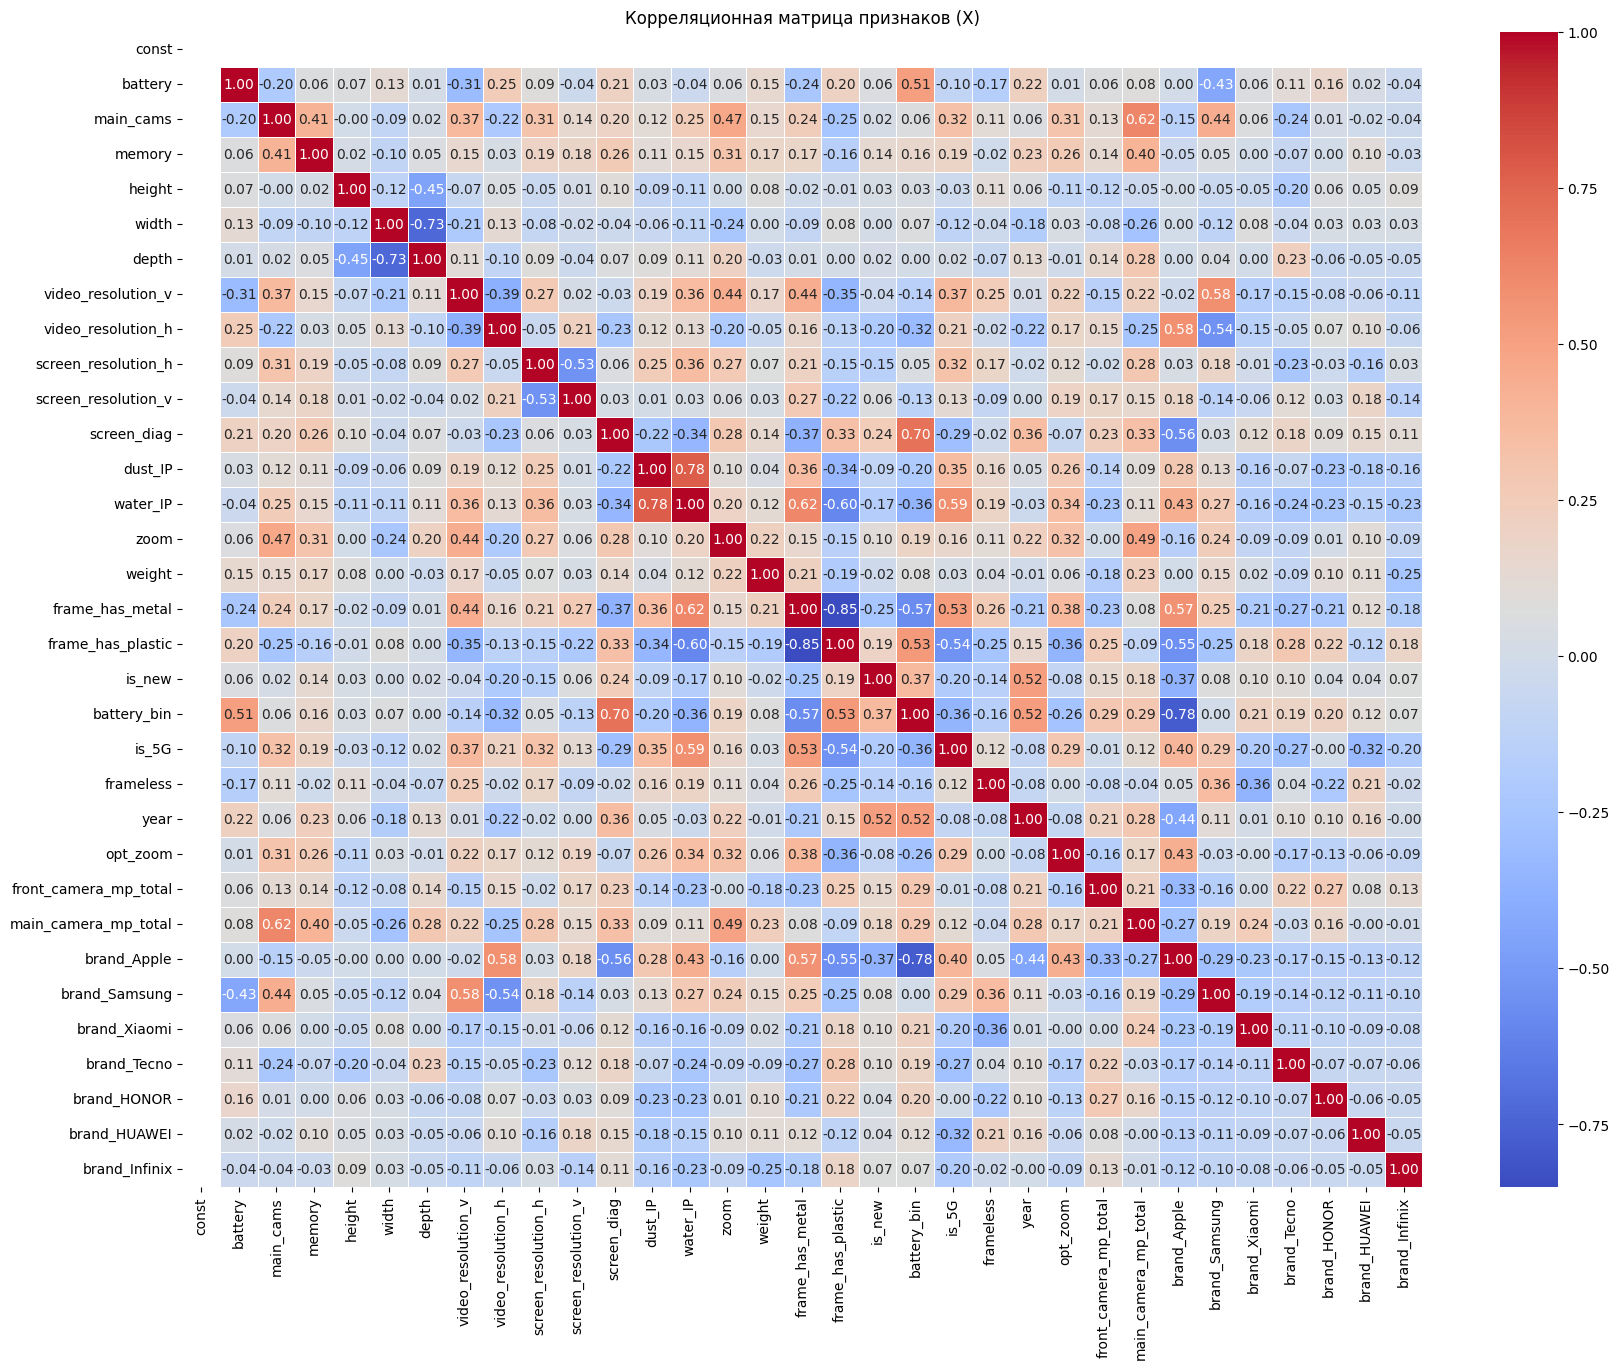

In [193]:
corr_matrix = X_filled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X)")
plt.show()

Давайте пока уберем has_metal и has_plastique: точнее сделаем из них одну переменну. Также надо убрать battery_bin (сильная корреляция с brand_Apple)

In [194]:
X_filled['strong_frame'] = X_filled['frame_has_metal'] - X_filled['frame_has_plastic']
X_filled = X_filled.drop(columns=['frame_has_metal', 'frame_has_plastic', 'battery_bin'])

In [195]:
X_filled.columns

Index(['const', 'battery', 'main_cams', 'memory', 'height', 'width', 'depth',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'zoom',
       'weight', 'is_new', 'is_5G', 'frameless', 'year', 'opt_zoom',
       'front_camera_mp_total', 'main_camera_mp_total', 'brand_Apple',
       'brand_Samsung', 'brand_Xiaomi', 'brand_Tecno', 'brand_HONOR',
       'brand_HUAWEI', 'brand_Infinix', 'strong_frame'],
      dtype='object')

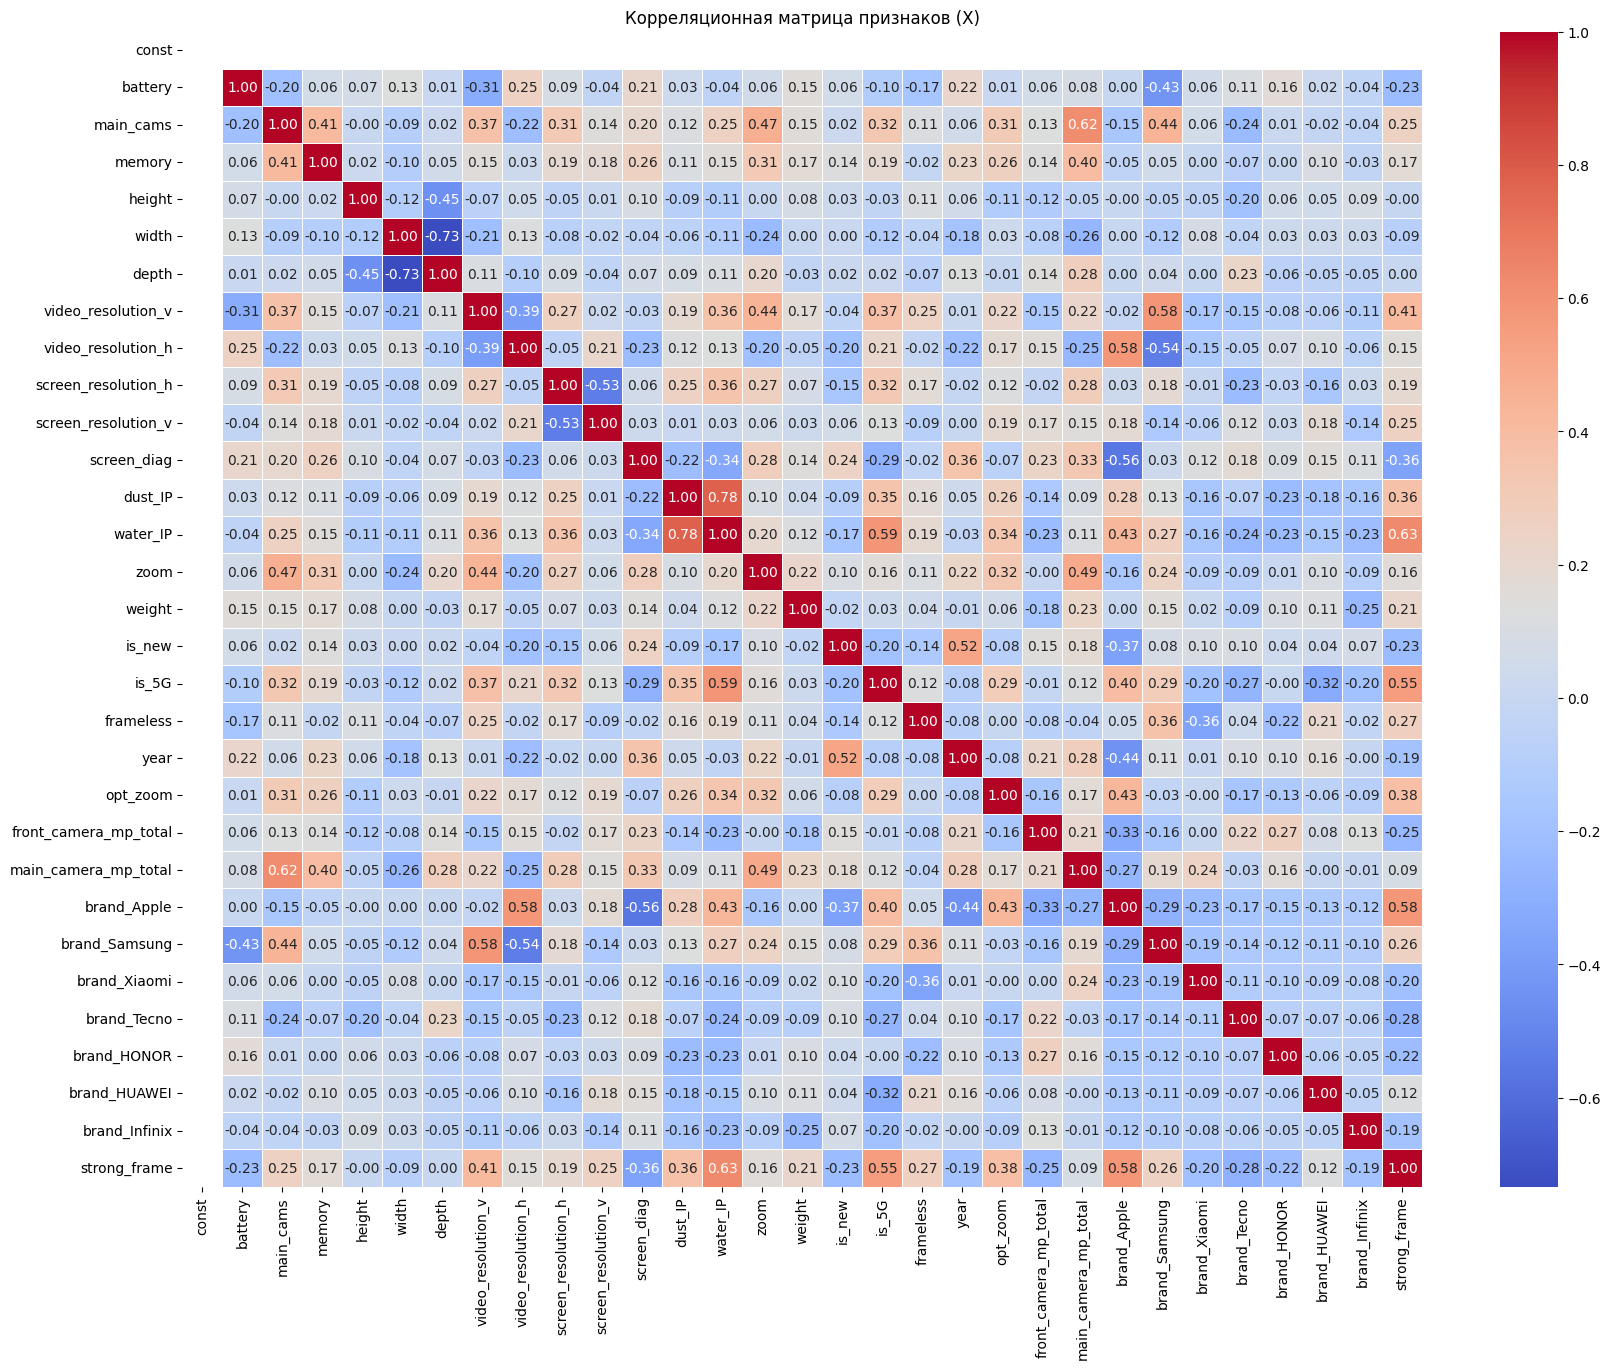

In [196]:
corr_matrix = X_filled.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X)")
plt.show()

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                  feature       VIF
0                   depth  8.999594
1             brand_Apple  7.447503
2                   width  6.979689
3                water_IP  5.416149
4            strong_frame  4.469619
5           brand_Samsung  4.311157
6                  height  3.957818
7                 dust_IP  3.299039
8    main_camera_mp_total  3.289248
9      video_resolution_h  3.231558
10    screen_resolution_h  3.114253
11                  is_5G  3.105402
12    screen_resolution_v  3.066574
13              main_cams  3.041774
14     video_resolution_v  2.427236
15           brand_HUAWEI  2.293758
16            screen_diag  2.247109
17                   zoom  2.175541
18           brand_Xiaomi  2.136447
19                   year  2.107385
20               opt_zoom  2.047528
21  front_camera_mp_total  2.019885
22                battery  1.961357
23            brand_Tecno  1.776104
24              frameless  1.693912
25            brand_HONOR  1.648680
26                 is_new  1

In [198]:
model_sm = sm.OLS(y, X_filled).fit()
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:54   Log-Likelihood:                -10508.
No. Observations:                 929   AIC:                         2.108e+04
Df Residuals:                     898   BIC:                         2.123e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.931e+

Гетероскедастичность

In [199]:
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     291.4
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:54   Log-Likelihood:                -10508.
No. Observations:                 929   AIC:                         2.108e+04
Df Residuals:                     898   BIC:                         2.123e+04
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.931e+

График Остатки vs Предсказания 

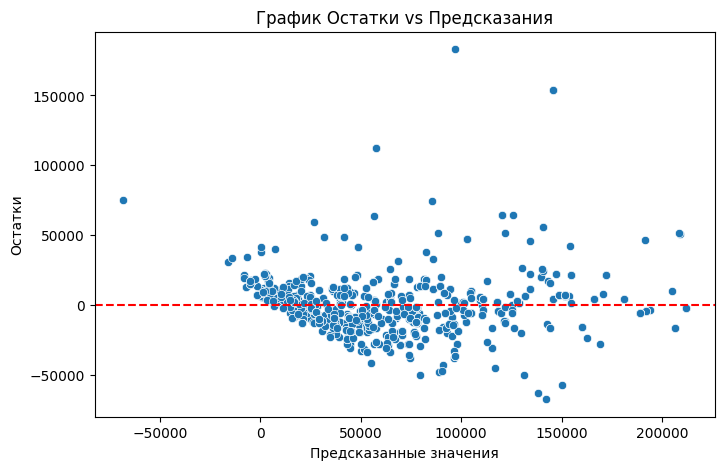

In [200]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

График свидетельствует о гетероскедастичности. Добавим к нему тест Уайта

In [201]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools.validation import array_like


def het_white(resid, exog):
    """
    White's Lagrange Multiplier Test for Heteroscedasticity.

    Parameters
    ----------
    resid : array_like
        The residuals. The squared residuals are used as the endogenous
        variable.
    exog : array_like
        The explanatory variables for the variance. Squares and interaction
        terms are automatically included in the auxiliary regression.

    Returns
    -------
    lm : float
        The lagrange multiplier statistic.
    lm_pvalue :float
        The p-value of lagrange multiplier test.
    fvalue : float
        The f-statistic of the hypothesis that the error variance does not
        depend on x. This is an alternative test variant not the original
        LM test.
    f_pvalue : float
        The p-value for the f-statistic.

    Notes
    -----
    Assumes x contains constant (for counting dof).

    question: does f-statistic make sense? constant ?

    References
    ----------
    Greene section 11.4.1 5th edition p. 222. Test statistic reproduces
    Greene 5th, example 11.3.
    """
    x = array_like(exog, "exog", ndim=2)
    y = array_like(resid, "resid", ndim=2, shape=(x.shape[0], 1))
    # _check_het_test(x, "White's heteroskedasticity")
    nobs, nvars0 = x.shape
    i0, i1 = np.triu_indices(nvars0)
    exog = x[:, i0] * x[:, i1]
    nobs, nvars = exog.shape
    assert nvars == nvars0 * (nvars0 - 1) / 2. + nvars0
    resols = sm.OLS(y ** 2, exog).fit()
    fval = resols.fvalue
    fpval = resols.f_pvalue
    lm = nobs * resols.rsquared

    lmpval = stats.chi2.sf(lm, resols.df_model)
    return lm, lmpval, fval, fpval



white_test = het_white(residuals, X_filled)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Test Statistic: 653.5168
Test Statistic p-value: 0.0000
F-Statistic: 3.5616
F-Test p-value: 0.0000


График свидетельтвует о неправильно выбранной функциональной форме, тест Уайта свидетельсвует о гетероскедастичности. Для того, чтобы устранить гетероскедастичность, воспользуемся стандартными ошибками в форме Уайта.

Выбор функциональной формы

Выберем между линейной и полулогарифмической моделью с помощью теста Бокса-Кокса

In [202]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2

# Пусть у нас есть:
y = df['salePrice'].copy()

n = len(y)
lambda_test = 0  # Проверим логарифмическую модель
Yg = np.exp(np.mean(np.log(y)))

# Zaremba's Box-Cox transformed response:
Z = (np.power(y, lambda_test) - 1) / (lambda_test * Yg**(lambda_test - 1)) if lambda_test != 0 else np.log(y)

# Модель 1: Обычная
model1 = sm.OLS(y, X_filled).fit()
RSS1 = np.sum(model1.resid ** 2)

# Модель 2: Преобразованная
model2 = sm.OLS(Z, X_filled).fit()
RSS2 = np.sum(model2.resid ** 2)

# Статистика
LM = n * np.log(RSS1 / RSS2)
p_value = 1 - chi2.cdf(LM, df=1)

print(f"RSS (линейная модель): {RSS1:.2f}")
print(f"RSS (лог-преобразованная модель): {RSS2:.2f}")
print(f"Статистика LM: {LM:.3f}")
print(f"P-значение: {p_value:.4f}")

if p_value < 0.05:
    print("Отвергаем H0: логарифмическая модель лучше.")
else:
    print("Нет оснований отвергать H0: можно оставить линейную модель.")


RSS (линейная модель): 363261443896.32
RSS (лог-преобразованная модель): 66.51
Статистика LM: 20829.162
P-значение: 0.0000
Отвергаем H0: логарифмическая модель лучше.


In [203]:
y = np.log(y)
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     477.0
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:55   Log-Likelihood:                -93.411
No. Observations:                 929   AIC:                             248.8
Df Residuals:                     898   BIC:                             398.7
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -162.31

Cнова проверим VIF, график остатки-предсказания.

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                  feature       VIF
0                   depth  8.999594
1             brand_Apple  7.447503
2                   width  6.979689
3                water_IP  5.416149
4            strong_frame  4.469619
5           brand_Samsung  4.311157
6                  height  3.957818
7                 dust_IP  3.299039
8    main_camera_mp_total  3.289248
9      video_resolution_h  3.231558
10    screen_resolution_h  3.114253
11                  is_5G  3.105402
12    screen_resolution_v  3.066574
13              main_cams  3.041774
14     video_resolution_v  2.427236
15           brand_HUAWEI  2.293758
16            screen_diag  2.247109
17                   zoom  2.175541
18           brand_Xiaomi  2.136447
19                   year  2.107385
20               opt_zoom  2.047528
21  front_camera_mp_total  2.019885
22                battery  1.961357
23            brand_Tecno  1.776104
24              frameless  1.693912
25            brand_HONOR  1.648680
26                 is_new  1

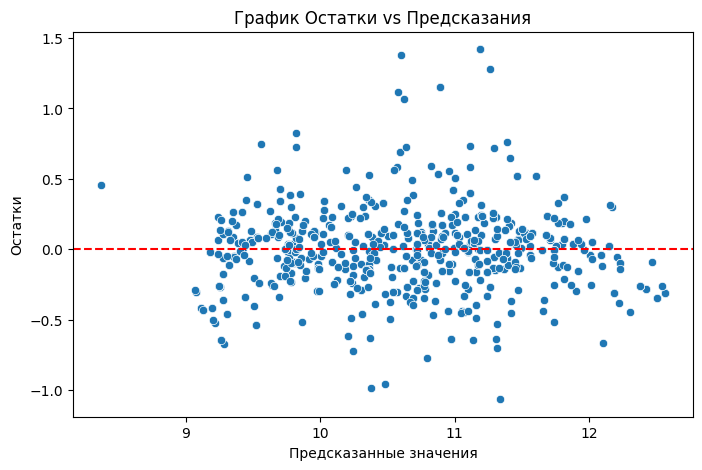

In [205]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

С новой функциональной формой график остатки-предсказания выглядит хорошо.

Заметим, что depth, width, height высоко коррелируют между собой. При этом логически кажется, что каждый из них может нести в себе часть информации для зависимой переменной. Преобразуем их с помощью PCA. Оставим количество компонент, опираясь на долю объясненной дисперсии.

In [206]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dims = X_filled[['video_resolution_v', 'video_resolution_h']].copy()

scaler = StandardScaler()
dims_scaled = scaler.fit_transform(dims)

pca = PCA(n_components=2)
dims_pca = pca.fit_transform(dims_scaled)

X_filled['dim_PC1'] = dims_pca[:, 0]
X_filled['dim_PC2'] = dims_pca[:, 1]

print("Доля объяснённой дисперсии:", pca.explained_variance_ratio_)


Доля объяснённой дисперсии: [0.69527868 0.30472132]


In [207]:
X_filled = X_filled.drop(columns = ['video_resolution_v', 'video_resolution_h'])
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     477.0
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:56   Log-Likelihood:                -93.411
No. Observations:                 929   AIC:                             248.8
Df Residuals:                     898   BIC:                             398.7
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -162.22

Оставим только периметр

In [208]:
X_filled['P'] = X_filled['width'] + X_filled['height']
X_filled['IP'] = X_filled['dust_IP'] + X_filled['water_IP']
X_filled = X_filled.drop(columns=['width', 'height', 'dust_IP', 'water_IP', 'depth'])

model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     478.1
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:56   Log-Likelihood:                -113.31
No. Observations:                 929   AIC:                             282.6
Df Residuals:                     901   BIC:                             418.0
Df Model:                          27                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -157.25

In [209]:
X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                  feature       VIF
0             brand_Apple  6.885274
1            strong_frame  4.362547
2           brand_Samsung  4.161884
3    main_camera_mp_total  3.072348
4     screen_resolution_h  3.013691
5               main_cams  3.003661
6                   is_5G  2.955288
7     screen_resolution_v  2.895624
8                 dim_PC1  2.721051
9                 dim_PC2  2.243907
10           brand_HUAWEI  2.239538
11                     IP  2.178245
12                   zoom  2.097675
13            screen_diag  2.091716
14           brand_Xiaomi  2.067309
15                   year  2.014224
16  front_camera_mp_total  2.003920
17               opt_zoom  1.853902
18                battery  1.790701
19            brand_Tecno  1.690052
20              frameless  1.650293
21            brand_HONOR  1.626160
22                 is_new  1.554196
23                 memory  1.519809
24                 weight  1.439679
25                      P  1.414514
26          brand_Infinix  1

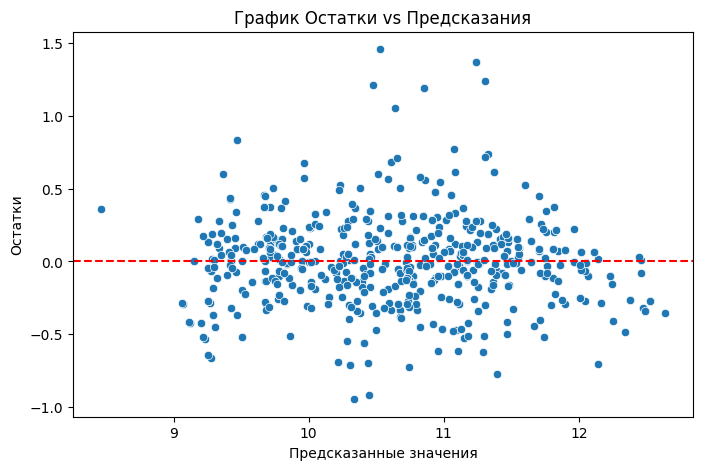

In [210]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Выбор остальных функциональных форм - для каждой переменной построим регрессию логарифмической зависимой переменной на нее и по R^2 выберем наиболее хорошую форму

In [211]:
X_filled.columns

Index(['const', 'battery', 'main_cams', 'memory', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'zoom', 'weight', 'is_new',
       'is_5G', 'frameless', 'year', 'opt_zoom', 'front_camera_mp_total',
       'main_camera_mp_total', 'brand_Apple', 'brand_Samsung', 'brand_Xiaomi',
       'brand_Tecno', 'brand_HONOR', 'brand_HUAWEI', 'brand_Infinix',
       'strong_frame', 'dim_PC1', 'dim_PC2', 'P', 'IP'],
      dtype='object')

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



log_price = np.log(data['salePrice'])
features = ['memory', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'zoom', 'weight', 'is_new', 'is_5G', 'frameless', 'year',
       'opt_zoom', 'brand_Apple', 'brand_Samsung', 'brand_Xiaomi',
       'brand_Tecno', 'brand_HONOR', 'brand_HUAWEI', 'brand_Infinix',
       'strong_frame', 'dim_PC1', 'dim_PC2', 'P', 'IP']

# Варианты преобразований
transformations = {
    'x': lambda x: x,
    'sqrt(x)': lambda x: np.sqrt(x),
    'log(x)': lambda x: np.log(x),
    'x^2': lambda x: np.power(x, 2), 
    'x^3': lambda x: np.power(x, 3),
    'x^4': lambda x: np.power(x, 4),
    'x^5': lambda x: np.power(x, 5),
}

results = []

for feature in features:
    
    x_raw = X_filled[feature]
    y = log_price

    for name, func in transformations.items():
        try:
            # Преобразование и фильтрация NaN и -inf
            x_transformed = func(x_raw)
            df_valid = pd.DataFrame({'x': x_transformed, 'y': y}).dropna()
            if np.any(~np.isfinite(df_valid['x'])):
                continue  # Пропуск если после логарифма получились -inf/inf

            x_final = df_valid['x'].values.reshape(-1, 1)
            y_final = df_valid['y'].values

            model = LinearRegression().fit(x_final, y_final)
            r2 = r2_score(y_final, model.predict(x_final))

            results.append((feature, name, r2))
        except:
            continue  # например, log от отрицательных

# Вывод: по каждому признаку — лучшее преобразование
results_df = pd.DataFrame(results, columns=['Feature', 'Transformation', 'R2'])
best_transforms = results_df.sort_values(['Feature', 'R2'], ascending=[True, False]).groupby('Feature').first().reset_index()

print(best_transforms)

                Feature Transformation        R2
0                    IP            x^4  0.495507
1                     P            x^5  0.128859
2           brand_Apple              x  0.241322
3           brand_HONOR              x  0.008218
4          brand_HUAWEI              x  0.001738
5         brand_Infinix              x  0.033923
6         brand_Samsung              x  0.075613
7           brand_Tecno              x  0.072250
8          brand_Xiaomi              x  0.045041
9               dim_PC1        sqrt(x)  0.433041
10              dim_PC2              x  0.343538
11            frameless              x  0.042148
12                is_5G              x  0.507242
13               is_new              x  0.000479
14               memory              x  0.215443
15             opt_zoom              x  0.266491
16          screen_diag         log(x)  0.041654
17  screen_resolution_h            x^5  0.200900
18  screen_resolution_v         log(x)  0.111842
19         strong_fr

In [213]:
X_filled['IP^2'] = np.square(X_filled['IP'])
X_filled['P^2'] = np.square(X_filled['P'])
# X_filled['log_dim_PC1'] = np.log1p(X_filled['dim_PC1'])
# X_filled['log_screen_diag'] = np.log1p(X_filled['screen_diag'])
X_filled['screen_resolution_h^2'] = np.square(X_filled['screen_resolution_h'])
X_filled['log_screen_resolution_v'] = np.log1p(X_filled['screen_resolution_v'])
X_filled['year^2'] = np.square(X_filled['year'])
X_filled['log_zoom'] = np.log1p(X_filled['zoom'])

In [214]:
model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
residuals = model_sm.resid
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     420.0
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:58   Log-Likelihood:                -81.556
No. Observations:                 929   AIC:                             231.1
Df Residuals:                     895   BIC:                             395.5
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [215]:
X_filled.columns

Index(['const', 'battery', 'main_cams', 'memory', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'zoom', 'weight', 'is_new',
       'is_5G', 'frameless', 'year', 'opt_zoom', 'front_camera_mp_total',
       'main_camera_mp_total', 'brand_Apple', 'brand_Samsung', 'brand_Xiaomi',
       'brand_Tecno', 'brand_HONOR', 'brand_HUAWEI', 'brand_Infinix',
       'strong_frame', 'dim_PC1', 'dim_PC2', 'P', 'IP', 'IP^2', 'P^2',
       'screen_resolution_h^2', 'log_screen_resolution_v', 'year^2',
       'log_zoom'],
      dtype='object')

In [216]:
# X_filled = X_filled.drop(columns=['dop_screen', 
#                                                 'video_resolution_v', 'video_resolution_h',
#                                                 'screen_resolution_v', 'screen_resolution_h',
#                                                 'IP', 'memory',
#                                           'weight', 'frameless', 'main_cams'])
# X_filled['memory_sq'] = X_filled['memory']**2
# X_filled['IP_sq'] = X_filled['IP']**2
X_filled['weight_sq'] = (X_filled['weight'] - X_filled['weight'].mean())**2
X_filled['frameless_year'] = X_filled['frameless'] * X_filled['year']
# X_filled['main_cams_year'] = X_filled['main_cams'] * X_filled['year']
# X_filled['is_5G_year'] = X_filled['is_5G'] * X_filled['year']

# X_filled = X_filled.drop(columns=['IP', 'P', 'dim_PC1', 'screen_diag', 'screen_resolution_h', 'screen_resolution_v'])

X_filled['memory_log'] = np.log(X_filled['memory'])
X_filled['brand_Apple_memory'] = X_filled['brand_Apple']*X_filled['memory']
# X_filled['brand_Apple_main_cams'] = X_filled['brand_Apple']*X_filled['main_cams']
# X_filled['brand_Apple_front_camera_mp_total'] = X_filled['brand_Apple']*X_filled['front_camera_mp_total']
X_filled['brand_Samsung_front_camera_mp_total'] = X_filled['brand_Samsung']*X_filled['front_camera_mp_total']
X_filled['brand_HUAWEI_front_camera_mp_total'] = X_filled['brand_HUAWEI']*X_filled['front_camera_mp_total']
# X_filled['brand_Apple_main_camera_mp_total'] = X_filled['brand_Apple']*X_filled['main_camera_mp_total']
X_filled['brand_Samsung_main_camera_mp_total'] = X_filled['brand_Samsung']*X_filled['main_camera_mp_total']
X_filled['brand_HUAWEI_main_camera_mp_total'] = X_filled['brand_HUAWEI']*X_filled['main_camera_mp_total']

X_filled = X_filled.drop(columns=['IP', 'P', 'dim_PC1', 'screen_diag', 'screen_resolution_h', 
                                  'screen_resolution_v', 'memory', 'brand_Samsung', 'year', 'brand_HUAWEI', 'frameless'])

model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     523.0
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:58   Log-Likelihood:                -85.207
No. Observations:                 929   AIC:                             232.4
Df Residuals:                     898   BIC:                             382.3
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [217]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=0.14385540943206832, p=0.7045676698788215, df_denom=897, df_num=1>


Тестирование нормальности остатков

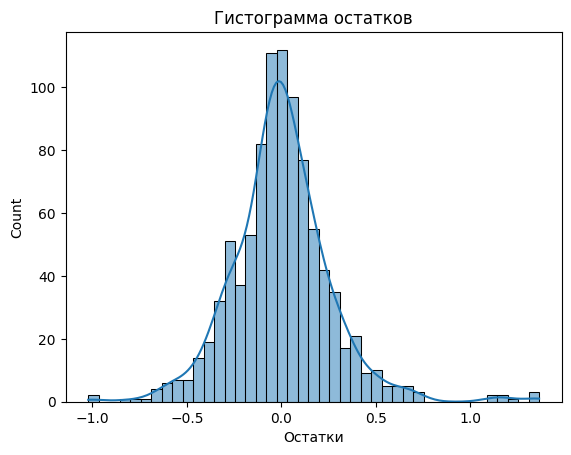

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.show()

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                                feature       VIF
0                           brand_Apple  7.415525
1    brand_Samsung_main_camera_mp_total  5.584120
2                              log_zoom  5.190549
3                  main_camera_mp_total  4.812351
4                                  zoom  4.589060
5                          strong_frame  4.050509
6                    brand_Apple_memory  3.573728
7                                 is_5G  3.122040
8                             main_cams  2.983477
9                 front_camera_mp_total  2.832303
10                           memory_log  2.789749
11                                 IP^2  2.771567
12  brand_Samsung_front_camera_mp_total  2.486758
13   brand_HUAWEI_front_camera_mp_total  2.418655
14                         brand_Xiaomi  2.415752
15    brand_HUAWEI_main_camera_mp_total  2.395323
16                screen_resolution_h^2  2.275398
17                              dim_PC2  2.242549
18                             opt_zoom  2.129547


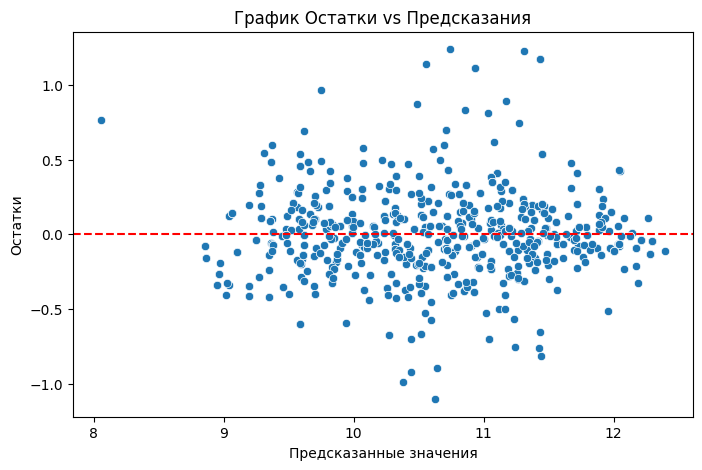

In [220]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

In [221]:
# Получим p-values и коэффициенты для всех признаков из итоговой модели
results = pd.DataFrame({
    'feature': model_sm.params.index,
    'coef': model_sm.params.values,
    'p_value': model_sm.pvalues.values
})

# Отсортируем по p_value в порядке возрастания
results_sorted = results.sort_values(by='p_value')

# Выведем признак, коэффициент и p-value
for _, row in results_sorted.iterrows():
    print(f"{row['feature']}: coef={row['coef']:.6f}, p_value={row['p_value']:.6f}")

is_new: coef=0.443442, p_value=0.000000
brand_Apple: coef=0.729982, p_value=0.000000
is_5G: coef=0.397425, p_value=0.000000
memory_log: coef=0.356060, p_value=0.000000
strong_frame: coef=0.244293, p_value=0.000000
year^2: coef=0.000021, p_value=0.000000
const: coef=-77.650872, p_value=0.000001
frameless_year: coef=0.000054, p_value=0.000002
log_zoom: coef=0.147638, p_value=0.000003
main_cams: coef=0.108072, p_value=0.000021
zoom: coef=-0.003459, p_value=0.000043
battery: coef=-0.000152, p_value=0.000045
dim_PC2: coef=0.079903, p_value=0.000102
brand_Apple_memory: coef=-0.000308, p_value=0.001973
IP^2: coef=0.000944, p_value=0.006782
brand_HUAWEI_front_camera_mp_total: coef=-0.005645, p_value=0.007272
main_camera_mp_total: coef=0.000954, p_value=0.012326
opt_zoom: coef=0.022844, p_value=0.020567
screen_resolution_h^2: coef=0.000000, p_value=0.020686
weight: coef=0.001692, p_value=0.029567
P^2: coef=-0.000003, p_value=0.038042
log_screen_resolution_v: coef=0.121430, p_value=0.191646
bran

In [222]:
X_filled = X_filled[['is_new', 'brand_Apple', 'is_5G', 'memory_log', 'strong_frame', 'main_cams', 'log_zoom', 
                    'zoom', 'frameless_year', 'year^2', 'dim_PC2', 'const', 'P^2', 'brand_Apple_memory', 'brand_HUAWEI_front_camera_mp_total', 
                    'IP^2', 'opt_zoom']]

model_sm = sm.OLS(y, X_filled).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     845.7
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        23:05:59   Log-Likelihood:                -128.35
No. Observations:                 929   AIC:                             290.7
Df Residuals:                     912   BIC:                             372.9
Df Model:                          16                                         
Covariance Type:                  HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
is_n

In [223]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=0.07636776336626198, p=0.7823441028348113, df_denom=911, df_num=1>


In [224]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = X_filled.drop(columns=['const'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)
X_scaled = sm.add_constant(X_scaled)

vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                               feature       VIF
0                          brand_Apple  5.663639
1                             log_zoom  4.263120
2                                 zoom  3.741150
3                   brand_Apple_memory  3.177043
4                         strong_frame  2.876119
5                                 IP^2  2.357852
6                                is_5G  2.312071
7                           memory_log  2.141546
8                            main_cams  1.958980
9                              dim_PC2  1.953754
10                            opt_zoom  1.891139
11                              year^2  1.830247
12                              is_new  1.489530
13  brand_HUAWEI_front_camera_mp_total  1.390894
14                      frameless_year  1.189234
15                                 P^2  1.118317
16                               const  1.000000


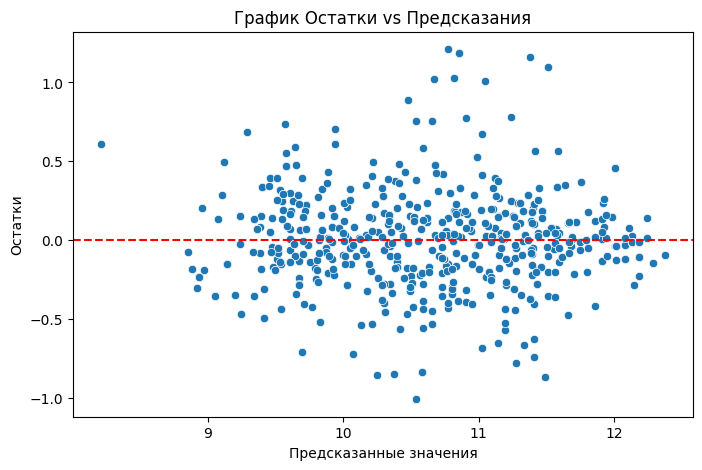

In [225]:
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

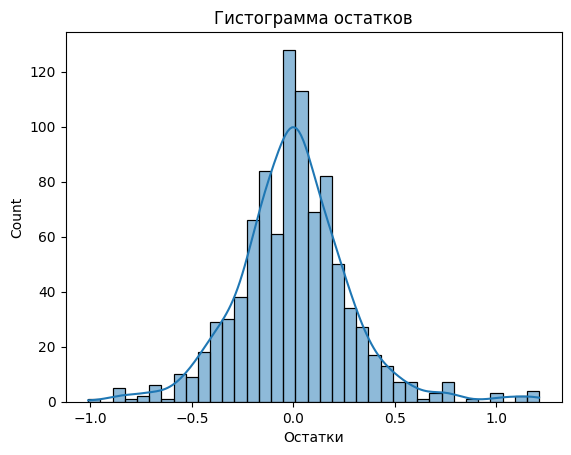

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.show()

Квантильная регрессия

In [227]:
X_filled['IP2'] = X_filled['IP^2']
X_filled['year2'] = X_filled['year^2']
X_filled['P2'] = X_filled['P^2']

Рассмотрим еще телефон с 
'is_new' = 1

'brand_Apple' = 0

'is_5G' = 1

'memory_log' = 7.600902459542082

'strong_frame' = -1

'main_cams' = 2

'log_zoom' = 3.433987

'zoom' = 30.000000

'frameless_year' = 2024

'year^2' = 4096576

'dim_PC2'= 0.691285

'const' = 1

'P^2' = 56786.8900

'brand_Apple_memory' = 0.0 

'brand_HUAWEI_front_camera_mp_total' = 0.0

'IP^2' = 196.0

'opt_zoom' = 3.0

In [228]:
import statsmodels.formula.api as smf
from tqdm import tqdm

data = X_filled.copy()
data['salePrice'] = y  # Добавляем целевую переменную

# Список предикторов (включая преобразованные переменные)
predictors = [
    'is_new', 'brand_Apple', 'is_5G', 'memory_log', 'strong_frame', 'main_cams', 'log_zoom', 
    'zoom', 'frameless_year', 'year2', 'dim_PC2', 'P2', 'brand_Apple_memory', 
    'brand_HUAWEI_front_camera_mp_total', 'IP2', 'opt_zoom'
]


# Формула для модели
formula = f"salePrice ~ {' + '.join(predictors)}"

# Квантильная регрессия для нескольких квантилей с бутстрапированными ошибками
np.random.seed(1001)
quantiles_mq = [0.1, 0.5, 0.75, 0.9]
models_mq = []  # здесь будем хранить финальные модели с правильными SE
n_boot = 50  # Количество бутстрап-итераций
boot = 50  # Количество бутстрап-итераций


phone_data = {
    'is_new': 1,
    'brand_Apple': 0,
    'is_5G': 1,
    'memory_log': 7.600902,
    'strong_frame': -1,
    'main_cams': 2,
    'log_zoom': 3.433987,
    'zoom': 30.0,
    'frameless_year': 2024,
    'year2': 4096576,
    'dim_PC2': 0.691285,
    'P2': 56786.89,
    'brand_Apple_memory': 0.0,
    'brand_HUAWEI_front_camera_mp_total': 0.0,
    'IP2': 196.0,
    'opt_zoom': 3.0,
    'const': 1  # Добавляем константу
}

phone_df = pd.DataFrame([phone_data])


# Бутстрэп-процедура
print("Запуск бутстрэп-процедуры...")
bootstrap_coefs = {q: [] for q in quantiles_mq}
for _ in tqdm(range(n_boot), desc="Прогресс"):
    bootstrap_sample = data.sample(n=len(data), replace=True)
    for q in quantiles_mq:
        model = smf.quantreg(formula, data=bootstrap_sample).fit(q=q)
        bootstrap_coefs[q].append(model.params)

# Создаем и сохраняем модели
models = {}
predictions = {}

# Создаем модели с бутстрап-стандартными ошибками
for q in quantiles_mq:
    # Основная модель
    main_model = smf.quantreg(formula, data=data).fit(q=q)
    
    # Рассчитываем бутстрап-стандартные ошибки
    coefs = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs.std()
    
    # Обновляем стандартные ошибки в модели
    main_model.bse = bse
    models_mq.append(main_model)

    # Делаем предсказание для телефона
    predictions[q] = main_model.predict(phone_df)[0]
    
    # Вывод результатов
    print(f"\n{'='*80}")
    print(f"=== Результаты квантильной регрессии для квантиля {q} (бутстрэп, n={n_boot}) ===")
    print(f"{'='*80}\n")
    print(main_model.summary())
    
# Функция для создания таблицы результатов
def create_results_table(q):
    main_model = smf.quantreg(formula, data=data).fit(q=q)
    coefs_df = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs_df.std()
    
    results = pd.DataFrame({
        'factor': ['Intercept'] + predictors,
        'coeff': [main_model.params[p] for p in ['Intercept'] + predictors],
        'std err (boot)': [bse[p] for p in ['Intercept'] + predictors],
        '95% CI low': [main_model.params[p] - 1.96*bse[p] for p in ['Intercept'] + predictors],
        '95% CI high': [main_model.params[p] + 1.96*bse[p] for p in ['Intercept'] + predictors],
        't-stat': [main_model.params[p]/bse[p] for p in ['Intercept'] + predictors],
        'p-value': [2*(1-stats.norm.cdf(abs(main_model.params[p]/bse[p]))) for p in ['Intercept'] + predictors]
    })
    
    # Форматирование чисел
    for col in results.columns[1:]:
        results[col] = results[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
    
    return results

# Вывод красивых таблиц для каждого квантиля
for q in quantiles_mq:
    print(f"\n{'='*80}")
    print(f"=== Результаты для квантиля {q} ===")
    print(f"{'='*80}\n")
    display(create_results_table(q))

# Вывод предсказаний
print("\n" + "="*80)
print("=== Предсказания цены для телефона ===")
print("="*80)
for q in quantiles_mq:
    print(f"Квантиль {q}: {predictions[q]:.2f}")

Запуск бутстрэп-процедуры...


Прогресс:   0%|          | 0/50 [00:00<?, ?it/s]

Прогресс: 100%|██████████| 50/50 [01:28<00:00,  1.77s/it]



=== Результаты квантильной регрессии для квантиля 0.1 (бутстрэп, n=50) ===

                         QuantReg Regression Results                          
Dep. Variable:              salePrice   Pseudo R-squared:               0.3708
Model:                       QuantReg   Bandwidth:                      0.2148
Method:                 Least Squares   Sparsity:                        2.511
Date:                Thu, 08 May 2025   No. Observations:                  929
Time:                        23:07:28   Df Residuals:                      912
                                        Df Model:                           16
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           -6.14e-09      0.000  -4.46e-05      1.000      -0.000       0.000
is_new                                -0.0001      0.123     

,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0000,0.0000,-0.0304,0.9757
1,is_new,-0.0001,0.0001,-0.0003,0.0000,-1.4843,0.1377
2,brand_Apple,0.0000,0.0001,-0.0001,0.0001,0.0267,0.9787
3,is_5G,-0.0001,0.0001,-0.0002,0.0001,-0.6654,0.5058
4,memory_log,0.0001,0.0002,-0.0002,0.0004,0.5808,0.5613
5,strong_frame,0.0007,0.0002,0.0003,0.0010,4.1674,0.0000
6,main_cams,0.0005,0.0002,0.0001,0.0008,2.7980,0.0051
7,log_zoom,-0.0000,0.0001,-0.0003,0.0003,-0.1460,0.8839
8,zoom,0.0080,0.0021,0.0039,0.0121,3.8571,0.0001
9,frameless_year,0.0001,0.0000,0.0000,0.0001,2.0216,0.0432



=== Результаты для квантиля 0.5 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0001,-0.0002,0.0002,-0.0006,0.9995
1,is_new,-0.0000,0.0530,-0.1039,0.1039,-0.0000,1.0000
2,brand_Apple,0.0000,0.0185,-0.0363,0.0364,0.0002,0.9998
3,is_5G,0.0000,0.0773,-0.1515,0.1516,0.0004,0.9997
4,memory_log,0.0001,0.0618,-0.1210,0.1212,0.0016,0.9988
5,strong_frame,0.0004,0.1069,-0.2092,0.2099,0.0033,0.9974
6,main_cams,0.0002,0.0392,-0.0765,0.0770,0.0063,0.9950
7,log_zoom,0.0003,0.0368,-0.0718,0.0724,0.0083,0.9934
8,zoom,0.0076,0.0032,0.0014,0.0137,2.3957,0.0166
9,frameless_year,0.0001,0.0000,0.0000,0.0001,3.1663,0.0015



=== Результаты для квантиля 0.75 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,0.0000,0.0000,-0.0001,0.0001,0.0011,0.9991
1,is_new,-0.0000,0.0020,-0.0039,0.0039,-0.0001,0.9999
2,brand_Apple,-0.0000,0.0178,-0.0349,0.0349,-0.0000,1.0000
3,is_5G,-0.0001,0.0616,-0.1208,0.1206,-0.0014,0.9989
4,memory_log,0.0000,0.0647,-0.1268,0.1269,0.0007,0.9994
5,strong_frame,0.0001,0.1077,-0.2110,0.2113,0.0012,0.9990
6,main_cams,0.0001,0.0550,-0.1077,0.1079,0.0019,0.9985
7,log_zoom,0.0003,0.0371,-0.0725,0.0731,0.0071,0.9943
8,zoom,0.0096,0.0043,0.0011,0.0182,2.2178,0.0266
9,frameless_year,0.0001,0.0000,0.0000,0.0001,2.1209,0.0339



=== Результаты для квантиля 0.9 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0001,0.0001,-0.0490,0.9609
1,is_new,0.0003,0.0011,-0.0018,0.0024,0.2992,0.7648
2,brand_Apple,-0.0000,0.0103,-0.0201,0.0201,-0.0007,0.9995
3,is_5G,0.0012,0.0595,-0.1154,0.1177,0.0194,0.9845
4,memory_log,0.0002,0.0531,-0.1039,0.1043,0.0044,0.9965
5,strong_frame,-0.0001,0.0983,-0.1928,0.1926,-0.0010,0.9992
6,main_cams,0.0001,0.0497,-0.0972,0.0975,0.0026,0.9979
7,log_zoom,0.0005,0.0359,-0.0699,0.0709,0.0146,0.9883
8,zoom,0.0132,0.0067,0.0001,0.0263,1.9717,0.0486
9,frameless_year,0.0001,0.0000,-0.0000,0.0001,1.4986,0.1340



=== Предсказания цены для телефона ===
Квантиль 0.1: 10.49
Квантиль 0.5: 11.09
Квантиль 0.75: 11.46
Квантиль 0.9: 11.73


Так как предсказанные цены взяты с логарифмом то возьмем экспоненту

10-й перцентиль (q=0.1): Телефон будет стоить 35,900

Медиана (q=0.5): Телефон будет стоить 65,200

75-й перцентиль (q=0.75): Телефон будет стоить 95,400

90-й перцентиль (q=0.9): Телефон будет стоить 123,500

Незначимые предикторы **brand_Apple**, **brand_Samsung**, **is_5G**, **wireless_charging**, **memory_log**, **is_new**, **strong_frame**, **log_zoom**, **dim_PC2**


#### **Динамика по квантилям**

**Для бюджетных телефонов (q=0.1):**
- Критичны: 
  - Качество фронтальной камеры (+0.0131, p=0.026)
  - Защита IP2 (+0.0075)
  - Оптический зум (+0.0016)

**Для премиальных (q=0.9):**
- Ключевые факторы:
  - Зум (+0.0132)
  - Год выпуска (year2)
  - Толщина рамки (frameless_year)


#### **Неожиданные находки**
- **brand_HUAWEI_front_camera_mp_total**:
  - Положительный эффект только на q=0.1 (+0.0131)
  - Отрицательный на q=0.9 (-0.0050, p=0.052)
  - Возможная сегментация: Huawei делает упор на фронтальные камеры в бюджетном сегменте

- **opt_zoom**:
  - Значим только на q=0.1 (+0.0016, p=0.0006)
  - Для флагманов не играет роли (p=0.885)


Построим новую квантильную регрессию без незначимых переменных

In [229]:
import statsmodels.formula.api as smf
from tqdm import tqdm

data = X_filled.copy()
data['salePrice'] = y  # Добавляем целевую переменную

# Список предикторов (включая преобразованные переменные)
predictors = [
    'strong_frame', 'main_cams', 'zoom', 'frameless_year', 'year2', 'P2', 'brand_Apple_memory', 
    'brand_HUAWEI_front_camera_mp_total', 'IP2', 'opt_zoom'
]


# Формула для модели
formula = f"salePrice ~ {' + '.join(predictors)}"

# Квантильная регрессия для нескольких квантилей с бутстрапированными ошибками
np.random.seed(1001)
quantiles_mq = [0.1, 0.5, 0.75, 0.9]
models_mq = []  # здесь будем хранить финальные модели с правильными SE
n_boot = 50  # Количество бутстрап-итераций
boot = 50  # Количество бутстрап-итераций

# Бутстрэп-процедура
print("Запуск бутстрэп-процедуры...")
bootstrap_coefs = {q: [] for q in quantiles_mq}
for _ in tqdm(range(n_boot), desc="Прогресс"):
    bootstrap_sample = data.sample(n=len(data), replace=True)
    for q in quantiles_mq:
        model = smf.quantreg(formula, data=bootstrap_sample).fit(q=q)
        bootstrap_coefs[q].append(model.params)

# Создаем модели с бутстрап-стандартными ошибками
for q in quantiles_mq:
    # Основная модель
    main_model = smf.quantreg(formula, data=data).fit(q=q)

    

    # Рассчитываем бутстрап-стандартные ошибки
    coefs = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs.std()
    
    # Обновляем стандартные ошибки в модели
    main_model.bse = bse
    models_mq.append(main_model)
    
    # Вывод результатов
    print(f"\n{'='*80}")
    print(f"=== Результаты квантильной регрессии для квантиля {q} (бутстрэп, n={n_boot}) ===")
    print(f"{'='*80}\n")
    print(main_model.summary())
    
# Функция для создания таблицы результатов
def create_results_table(q):
    main_model = smf.quantreg(formula, data=data).fit(q=q)
    coefs_df = pd.DataFrame(bootstrap_coefs[q])
    bse = coefs_df.std()
    
    results = pd.DataFrame({
        'factor': ['Intercept'] + predictors,
        'coeff': [main_model.params[p] for p in ['Intercept'] + predictors],
        'std err (boot)': [bse[p] for p in ['Intercept'] + predictors],
        '95% CI low': [main_model.params[p] - 1.96*bse[p] for p in ['Intercept'] + predictors],
        '95% CI high': [main_model.params[p] + 1.96*bse[p] for p in ['Intercept'] + predictors],
        't-stat': [main_model.params[p]/bse[p] for p in ['Intercept'] + predictors],
        'p-value': [2*(1-stats.norm.cdf(abs(main_model.params[p]/bse[p]))) for p in ['Intercept'] + predictors]
    })
    
    # Форматирование чисел
    for col in results.columns[1:]:
        results[col] = results[col].apply(lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else x)
    
    return results

# Вывод красивых таблиц для каждого квантиля
for q in quantiles_mq:
    print(f"\n{'='*80}")
    print(f"=== Результаты для квантиля {q} ===")
    print(f"{'='*80}\n")
    display(create_results_table(q))

Запуск бутстрэп-процедуры...


Прогресс: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it]



=== Результаты квантильной регрессии для квантиля 0.1 (бутстрэп, n=50) ===

                         QuantReg Regression Results                          
Dep. Variable:              salePrice   Pseudo R-squared:               0.3707
Model:                       QuantReg   Bandwidth:                      0.2148
Method:                 Least Squares   Sparsity:                        2.511
Date:                Thu, 08 May 2025   No. Observations:                  929
Time:                        23:08:41   Df Residuals:                      918
                                        Df Model:                           10
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           -6.23e-09   1.52e-05     -0.000      1.000   -2.98e-05    2.98e-05
strong_frame                           0.0007      0.050     

,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0000,0.0000,-0.0274,0.9781
1,strong_frame,0.0007,0.0002,0.0002,0.0011,2.8363,0.0046
2,main_cams,0.0005,0.0002,0.0001,0.0008,2.4582,0.0140
3,zoom,0.0080,0.0020,0.0040,0.0120,3.9430,0.0001
4,frameless_year,0.0001,0.0000,0.0000,0.0001,2.0187,0.0435
5,year2,0.0000,0.0000,0.0000,0.0000,36.4976,0.0000
6,P2,-0.0000,0.0000,-0.0000,0.0000,-0.0450,0.9641
7,brand_Apple_memory,0.0018,0.0002,0.0014,0.0021,10.9472,0.0000
8,brand_HUAWEI_front_camera_mp_total,0.0131,0.0011,0.0110,0.0152,12.2134,0.0000
9,IP2,0.0075,0.0006,0.0064,0.0086,13.3829,0.0000



=== Результаты для квантиля 0.5 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0000,0.0000,-0.0046,0.9963
1,strong_frame,0.0004,0.0390,-0.0761,0.0768,0.0091,0.9928
2,main_cams,0.0002,0.0148,-0.0288,0.0293,0.0167,0.9867
3,zoom,0.0076,0.0019,0.0039,0.0112,4.0882,0.0000
4,frameless_year,0.0001,0.0000,0.0000,0.0001,3.1458,0.0017
5,year2,0.0000,0.0000,0.0000,0.0000,26.8271,0.0000
6,P2,-0.0000,0.0000,-0.0000,-0.0000,-2.0690,0.0385
7,brand_Apple_memory,0.0019,0.0003,0.0013,0.0025,6.2808,0.0000
8,brand_HUAWEI_front_camera_mp_total,0.0037,0.0028,-0.0018,0.0093,1.3144,0.1887
9,IP2,0.0073,0.0005,0.0063,0.0083,14.4675,0.0000



=== Результаты для квантиля 0.75 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,0.0000,0.0000,-0.0000,0.0000,0.0286,0.9772
1,strong_frame,0.0001,0.0002,-0.0003,0.0005,0.4772,0.6332
2,main_cams,0.0002,0.0014,-0.0026,0.0030,0.1426,0.8866
3,zoom,0.0096,0.0023,0.0051,0.0141,4.1980,0.0000
4,frameless_year,0.0001,0.0000,-0.0000,0.0001,1.7906,0.0734
5,year2,0.0000,0.0000,0.0000,0.0000,14.7634,0.0000
6,P2,-0.0000,0.0000,-0.0000,0.0000,-0.4332,0.6649
7,brand_Apple_memory,0.0015,0.0002,0.0010,0.0019,6.2816,0.0000
8,brand_HUAWEI_front_camera_mp_total,-0.0013,0.0027,-0.0066,0.0040,-0.4716,0.6372
9,IP2,0.0070,0.0007,0.0056,0.0083,10.0885,0.0000



=== Результаты для квантиля 0.9 ===



,factor,coeff,std err (boot),95% CI low,95% CI high,t-stat,p-value
0,Intercept,-0.0000,0.0000,-0.0000,0.0000,-0.0056,0.9955
1,strong_frame,0.0001,0.0554,-0.1084,0.1087,0.0023,0.9981
2,main_cams,0.0005,0.0290,-0.0563,0.0573,0.0161,0.9872
3,zoom,0.0133,0.0058,0.0020,0.0246,2.3143,0.0207
4,frameless_year,0.0001,0.0000,-0.0000,0.0001,1.6517,0.0986
5,year2,0.0000,0.0000,0.0000,0.0000,20.9657,0.0000
6,P2,0.0000,0.0000,-0.0000,0.0000,0.5168,0.6053
7,brand_Apple_memory,0.0013,0.0003,0.0008,0.0018,4.9019,0.0000
8,brand_HUAWEI_front_camera_mp_total,-0.0052,0.0025,-0.0101,-0.0004,-2.1085,0.0350
9,IP2,0.0054,0.0009,0.0037,0.0071,6.2209,0.0000


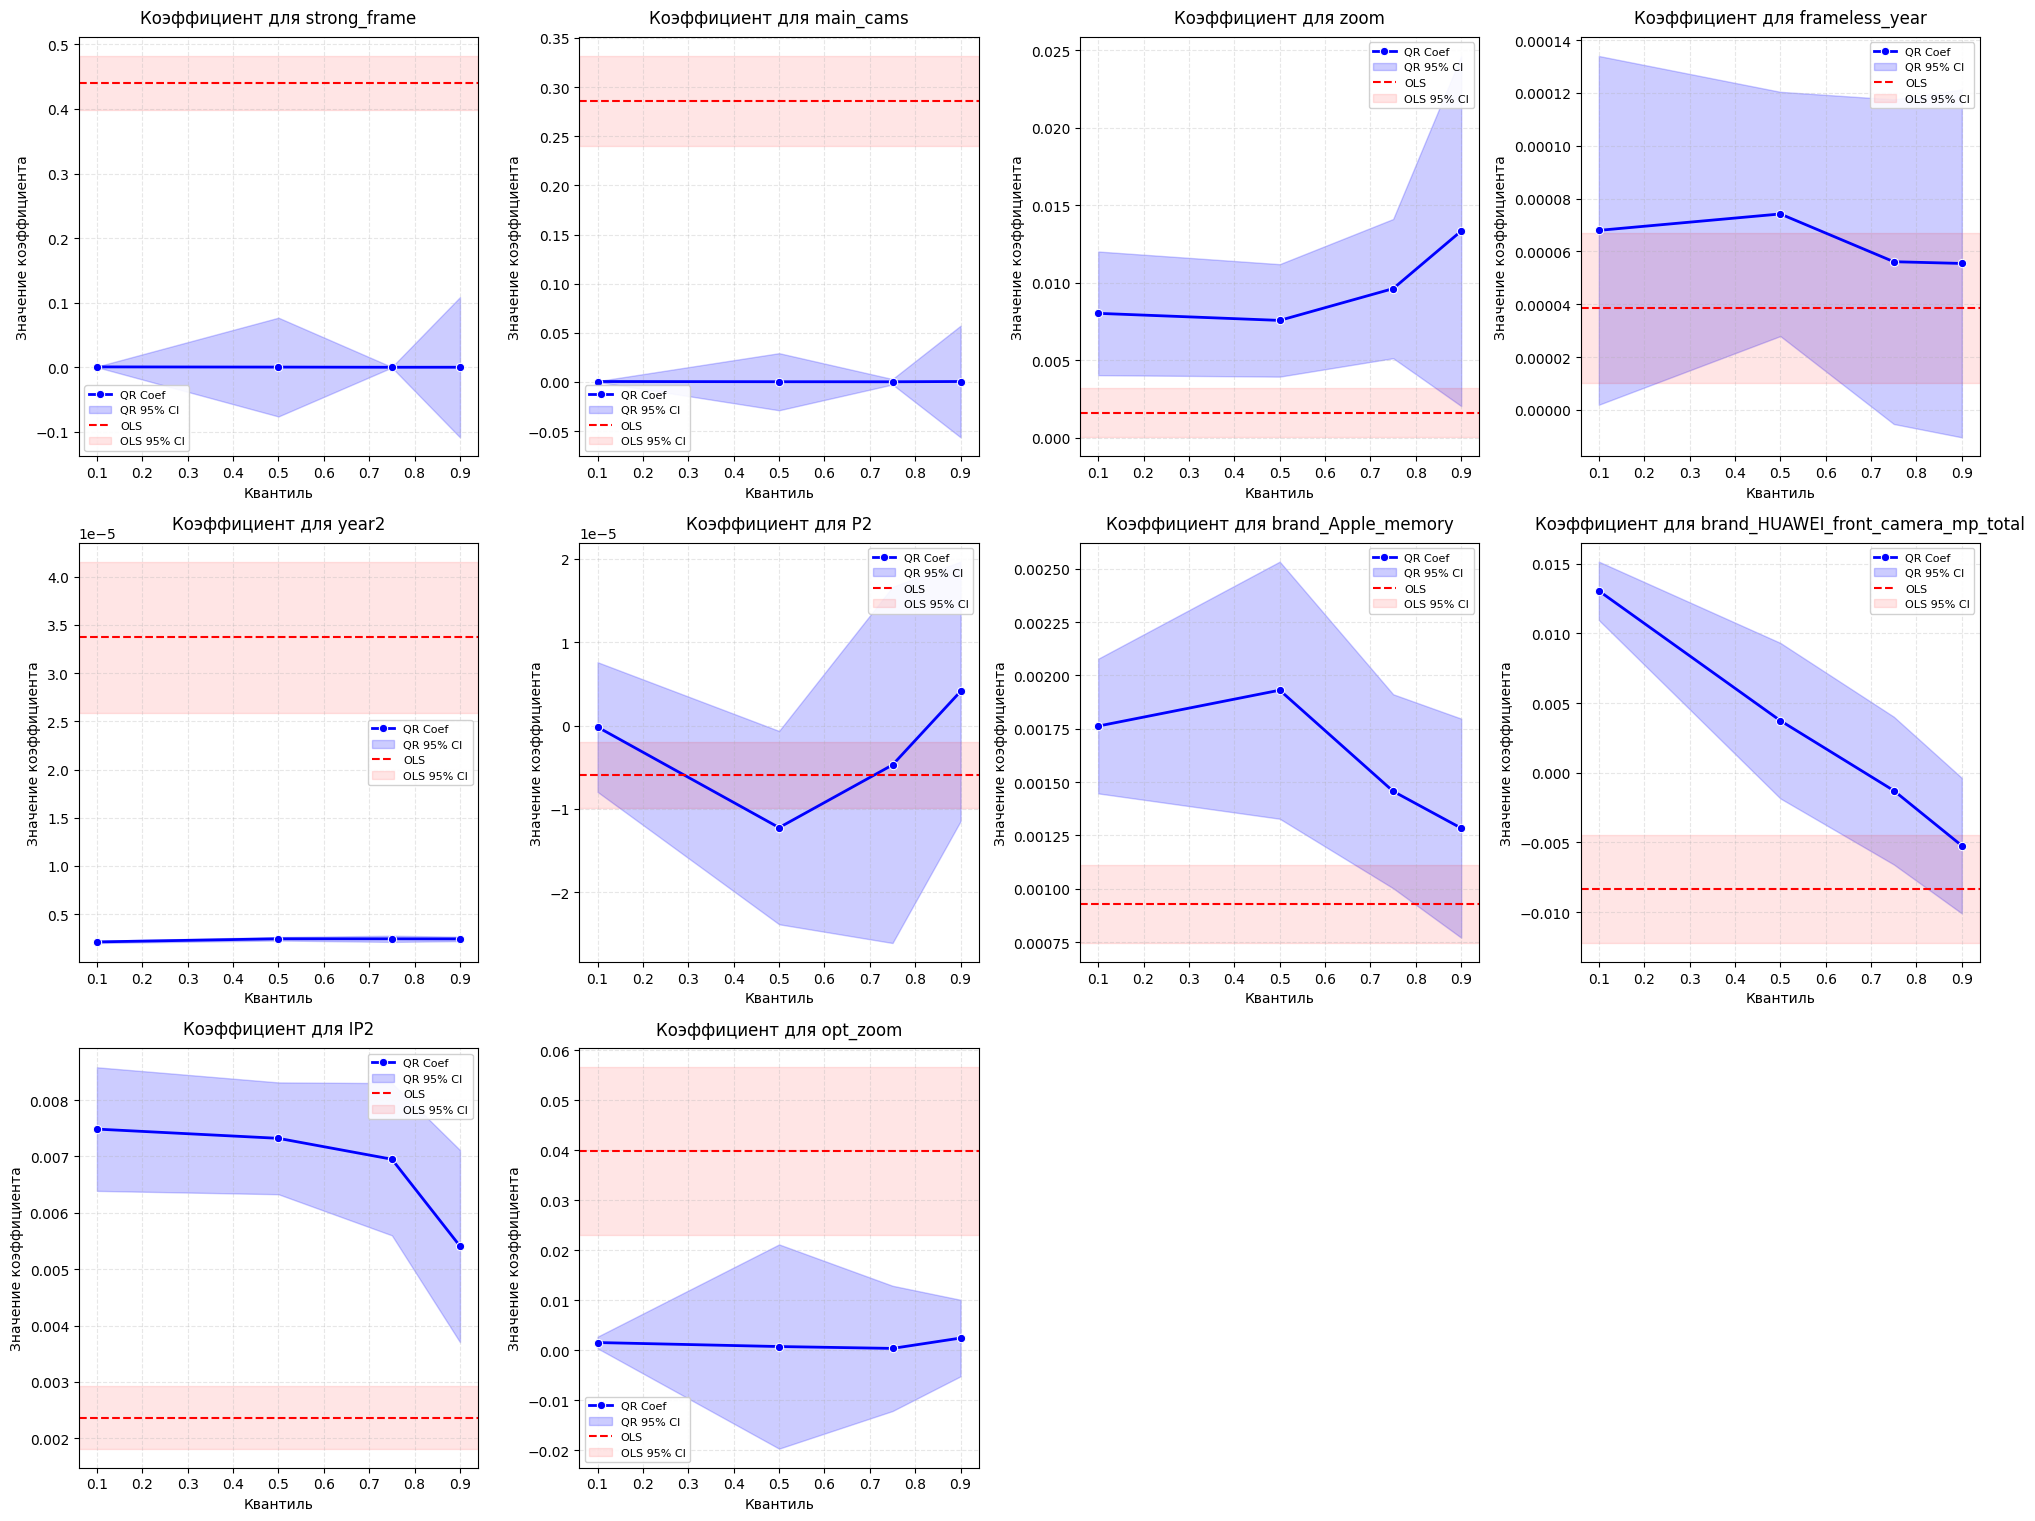

In [230]:
# Создаем DataFrame для хранения результатов
plot_data = pd.DataFrame()

# Список предикторов (включая преобразованные переменные)
predictors = [
    'strong_frame', 'main_cams', 'zoom', 'frameless_year', 'year2', 'P2', 'brand_Apple_memory', 
    'brand_HUAWEI_front_camera_mp_total', 'IP2', 'opt_zoom'
]

# Собираем данные по всем квантилям
for q in quantiles_mq:
    model = models_mq[quantiles_mq.index(q)]
    
    # Создаем временный DataFrame для текущего квантиля
    temp_df = pd.DataFrame({'quantile': q}, index=[0])
    
    # Добавляем коэффициенты и доверительные интервалы для каждой переменной
    for pred in predictors:
        if pred in model.params:  # Проверяем наличие переменной в модели
            temp_df[pred] = model.params[pred]
            temp_df[f'{pred}_lower'] = model.params[pred] - 1.96 * model.bse[pred]
            temp_df[f'{pred}_upper'] = model.params[pred] + 1.96 * model.bse[pred]
    
    plot_data = pd.concat([plot_data, temp_df], ignore_index=True)

# Оцениваем OLS модель для сравнения
ols_model = smf.ols('salePrice ~ ' + ' + '.join(predictors), data=data).fit()
ols_conf_int = ols_model.conf_int()

# Создаем сетку графиков
n_rows = 5  # Можете настроить по своему усмотрению
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
axes = axes.flatten()

# Визуализация для каждой переменной
for i, pred in enumerate(predictors):
    if i < len(axes):  # Защита от выхода за пределы сетки
        ax = axes[i]
        
        # Квантильная регрессия
        sns.lineplot(data=plot_data, x='quantile', y=pred, ax=ax,
                    color='blue', marker='o', label='QR Coef', linewidth=2)
        ax.fill_between(plot_data['quantile'],
                       plot_data[f'{pred}_lower'],
                       plot_data[f'{pred}_upper'],
                       color='blue', alpha=0.2, label='QR 95% CI')
        
        # OLS для сравнения (если переменная есть в OLS модели)
        if pred in ols_model.params:
            ols_coef = ols_model.params[pred]
            ols_lower = ols_conf_int.loc[pred, 0]
            ols_upper = ols_conf_int.loc[pred, 1]
            
            ax.axhline(ols_coef, color='red', linestyle='--',
                      linewidth=1.5, label='OLS')
            ax.axhspan(ols_lower, ols_upper,
                      color='red', alpha=0.1, label='OLS 95% CI')
        
        # Настройки графика
        ax.set_title(f'Коэффициент для {pred}', fontsize=12, pad=10)
        ax.set_xlabel('Квантиль', fontsize=10)
        ax.set_ylabel('Значение коэффициента', fontsize=10)
        ax.legend(fontsize=8, framealpha=0.9)
        ax.grid(True, linestyle='--', alpha=0.3)

# Удаляем пустые оси
for j in range(len(predictors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**`zoom`** монотонно растёт от 0.1 к 0.9 квантилю: влияние зума становится сильнее в дорогих смартфонах.

**`frameless_year`** умеренно положительный, незначительно уменьшается к высокому квантилю.

**`year2`** стабилен и почти не изменяются между квантилями.

**`P2`** показывает чёткую смену знака: отрицательное влияние в низких квантилях и положительное — в верхних.

**`brand_Apple_memory`** уменьшается с ростом квантиля, но остаётся положительным.

**`brand_HUAWEI_front_camera_mp_total`** показывает явное уменьшение влияния, в верхних квантилях коэффициент близок к 0.

**`IP2`** показывает постепенное снижение коэффициента от 0.1 к 0.9.

**`opt_zoom`** все значения близки к нулю, широкие интервалы.

**`main_cams`, `strong_frame`** коэффициенты близки к 0 и малозначимы по всем квантилям.

In [231]:
# Тест на равенство коэффициентов между квантилями (пример для zoom)
coef_01 = models_mq[0].params['zoom']  # q=0.1
coef_09 = models_mq[3].params['zoom']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['zoom']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['zoom']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для zoom (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для zoom (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0080 (std err: 0.0020)
Коэффициент для q=0.9: 0.0133 (std err: 0.0058)
Разность: -0.0053 (std err: 0.0061)
Wald statistic: -0.8690
P-value: 0.3848
Заключение: Не отвергаем H0 (p=0.3848 >= 0.05). Нет доказательств различий.


In [232]:
# Тест на равенство коэффициентов между квантилями (пример для frameless_year)
coef_01 = models_mq[0].params['frameless_year']  # q=0.1
coef_09 = models_mq[3].params['frameless_year']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['frameless_year']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['frameless_year']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для frameless_year (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для frameless_year (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0001 (std err: 0.0000)
Коэффициент для q=0.9: 0.0001 (std err: 0.0000)
Разность: 0.0000 (std err: 0.0000)
Wald statistic: 0.2632
P-value: 0.7924
Заключение: Не отвергаем H0 (p=0.7924 >= 0.05). Нет доказательств различий.


In [233]:
# Тест на равенство коэффициентов между квантилями (пример для year2)
coef_01 = models_mq[0].params['year2']  # q=0.1
coef_09 = models_mq[3].params['year2']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['year2']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['year2']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для year2 (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для year2 (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0000 (std err: 0.0000)
Коэффициент для q=0.9: 0.0000 (std err: 0.0000)
Разность: -0.0000 (std err: 0.0000)
Wald statistic: -2.4093
P-value: 0.0160
Заключение: Отвергаем H0 (p=0.0160 < 0.05). Коэффициенты различаются.


In [234]:
# Тест на равенство коэффициентов между квантилями (пример для year)
coef_01 = models_mq[0].params['P2']  # q=0.1
coef_09 = models_mq[3].params['P2']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['P2']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['P2']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для year (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для year (q=0.1 vs q=0.9):
Коэффициент для q=0.1: -0.0000 (std err: 0.0000)
Коэффициент для q=0.9: 0.0000 (std err: 0.0000)
Разность: -0.0000 (std err: 0.0000)
Wald statistic: -0.4824
P-value: 0.6295
Заключение: Не отвергаем H0 (p=0.6295 >= 0.05). Нет доказательств различий.


In [235]:
# Тест на равенство коэффициентов между квантилями (пример для brand_HUAWEI_front_camera_mp_total)
coef_01 = models_mq[0].params['brand_HUAWEI_front_camera_mp_total']  # q=0.1
coef_09 = models_mq[3].params['brand_HUAWEI_front_camera_mp_total']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['brand_HUAWEI_front_camera_mp_total']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['brand_HUAWEI_front_camera_mp_total']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для brand_HUAWEI_front_camera_mp_total (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для brand_HUAWEI_front_camera_mp_total (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0131 (std err: 0.0011)
Коэффициент для q=0.9: -0.0052 (std err: 0.0025)
Разность: 0.0183 (std err: 0.0027)
Wald statistic: 6.7707
P-value: 0.0000
Заключение: Отвергаем H0 (p=0.0000 < 0.05). Коэффициенты различаются.


In [236]:
# Тест на равенство коэффициентов между квантилями (пример для 'brand_Apple_memory')
coef_01 = models_mq[0].params['brand_Apple_memory']  # q=0.1
coef_09 = models_mq[3].params['brand_Apple_memory']  # q=0.9

se_01 = pd.DataFrame(bootstrap_coefs[0.1]).std()['brand_Apple_memory']
se_09 = pd.DataFrame(bootstrap_coefs[0.9]).std()['brand_Apple_memory']

diff = coef_01 - coef_09
se_diff = np.sqrt(se_01**2 + se_09**2)
wald_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("\nТест равенства коэффициентов для 'brand_Apple_memory' (q=0.1 vs q=0.9):")
print(f"Коэффициент для q=0.1: {coef_01:.4f} (std err: {se_01:.4f})")
print(f"Коэффициент для q=0.9: {coef_09:.4f} (std err: {se_09:.4f})")
print(f"Разность: {diff:.4f} (std err: {se_diff:.4f})")
print(f"Wald statistic: {wald_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"Заключение: Отвергаем H0 (p={p_value:.4f} < {alpha}). Коэффициенты различаются.")
else:
    print(f"Заключение: Не отвергаем H0 (p={p_value:.4f} >= {alpha}). Нет доказательств различий.")


Тест равенства коэффициентов для 'brand_Apple_memory' (q=0.1 vs q=0.9):
Коэффициент для q=0.1: 0.0018 (std err: 0.0002)
Коэффициент для q=0.9: 0.0013 (std err: 0.0003)
Разность: 0.0005 (std err: 0.0003)
Wald statistic: 1.5561
P-value: 0.1197
Заключение: Не отвергаем H0 (p=0.1197 >= 0.05). Нет доказательств различий.
